In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import datetime
#libraries that will be used for data collection, storing, cleaning

In [2]:
%%time
raw_data=pd.read_csv('data.csv')  #reading in the raw data from the csv and stored into dataframe
# chunks = pd.read_csv('data.csv', chunksize=1000000)
# raw_data = pd.concat(chunks)

<string>:2: DtypeWarning:

Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.



CPU times: user 27.1 s, sys: 2.17 s, total: 29.2 s
Wall time: 27.6 s


In [3]:
#cleaning the data

#dropping the duplicate and unwanted columns
after_dropped_data=raw_data.drop(columns=['Location','Updated On','X Coordinate','Y Coordinate']) #columns which are not necessary and are duplicates


#converting the date column from string to datetime
after_dropped_data['Date']=after_dropped_data['Date'].apply(lambda x:datetime.datetime.strptime(x, '%m/%d/%Y %H:%M:%S %p'))
#counting for each column of how many null values are there
count=after_dropped_data.isna().sum() 

#getting the selected colums with null values and their count
def get_cols_withNan(series):      
    hasNaN_col=[]
    for index, value in series.items():
        if(value>0):
            hasNaN_col.append(index)
    return series[hasNaN_col]


#fixing the NaN data

# #total count of non null values
nonNull_columns= after_dropped_data.count()

# #total columns with null values
Columns_with_null=get_cols_withNan(count)

#comparing null vs non null
percent=(Columns_with_null/nonNull_columns)*100

#final dataframe with the data
columns={'Total Null':Columns_with_null,'Total Non-Null':nonNull_columns,'Percent':percent}
NullvsNonNull=pd.DataFrame(columns).dropna()

#from the table it is visible that what columns have nulls and their percents
print(NullvsNonNull)



                      Total Null  Total Non-Null   Percent
Case Number                  4.0         7083777  0.000056
Community Area          613495.0         6470286  9.481729
District                    47.0         7083734  0.000663
Latitude                 67990.0         7015791  0.969100
Location Description      6320.0         7077461  0.089298
Longitude                67990.0         7015791  0.969100
Ward                    614828.0         6468953  9.504289


In [4]:
# cleaniing the instances which have NaN

#it is visible that Column Ward has 9.50% and Column Area has 9.48% null values so I am dropping that column too.
after_dropped_data=after_dropped_data.drop(columns=['Community Area','Ward'])
#replacing null values
#district, location description set to unknown  and longitude-latitude set to chicago in general 
changeNaN={'Case Number':0,'District':'Unknown','Location Description':'Unknown','Latitude':41.8781,'Longitude':87.6298}
after_dropped_data.fillna(changeNaN,inplace=True)

after_dropped_data.notna().all()
#data has been prepared and cleaned now

ID                      True
Case Number             True
Date                    True
Block                   True
IUCR                    True
Primary Type            True
Description             True
Location Description    True
Arrest                  True
Domestic                True
Beat                    True
District                True
FBI Code                True
Year                    True
Latitude                True
Longitude               True
dtype: bool

       Crime Count
Month             
7           655582
8           648995
5           626869
6           623900
10          614687
9           608124
4           580234
3           578681
1           567903
11          553495


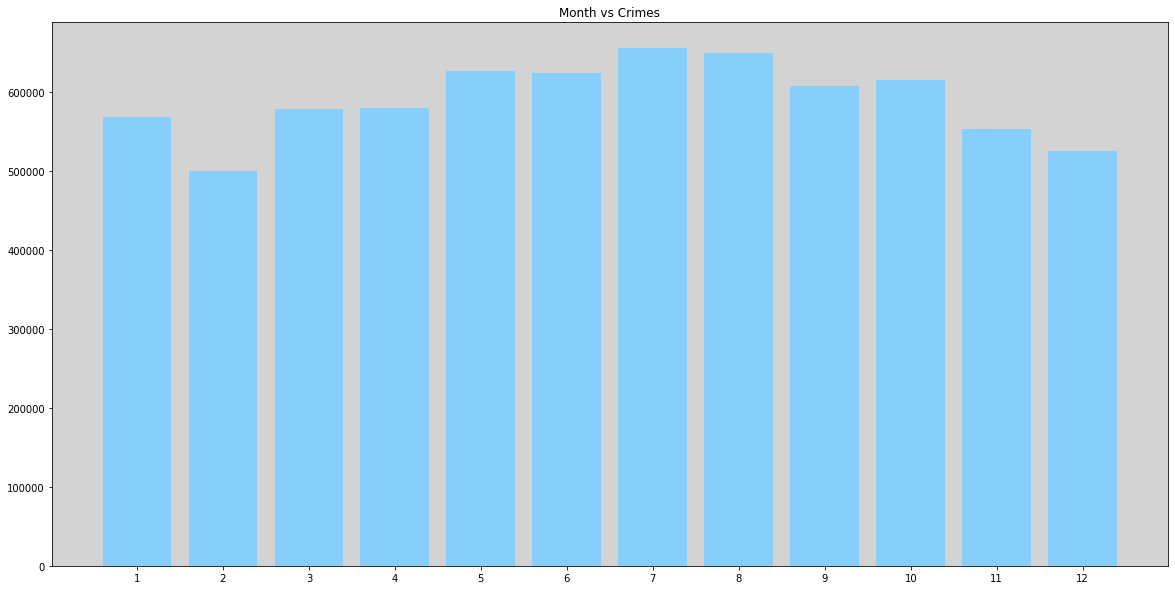

     Crime Count
Day             
1         279288
15        240844
20        236583
10        234198
17        233589
14        233223
16        232887
12        232090
18        231834
21        231590


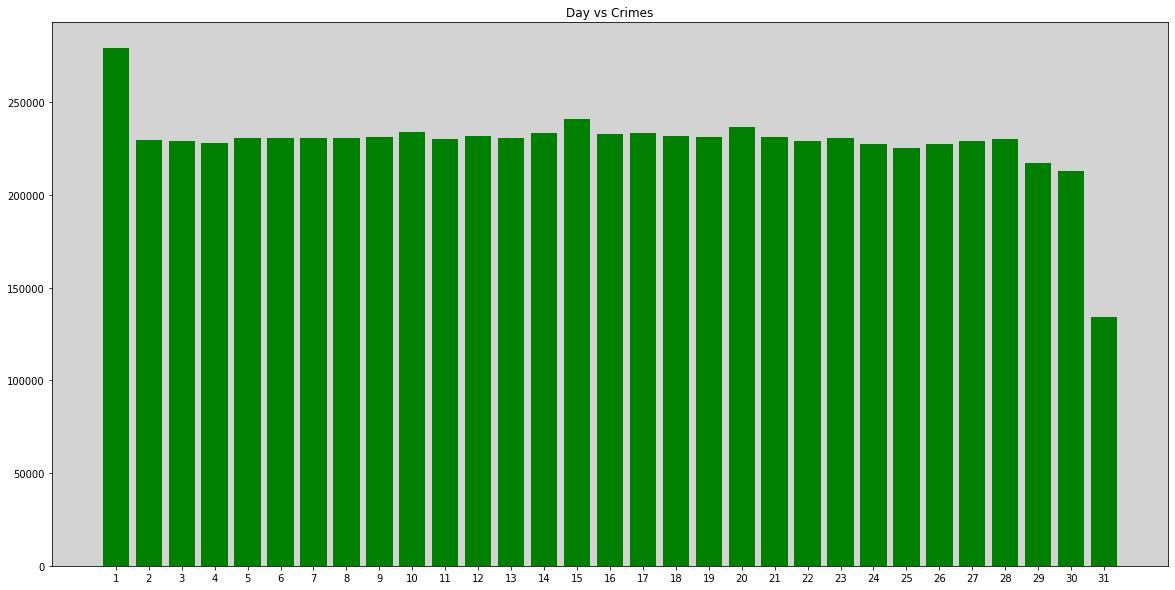

      Crime Count
Hour             
12         795409
9          696188
10         684107
8          641739
11         632546
7          564452
1          561432
2          547304
3          529094
6          501938


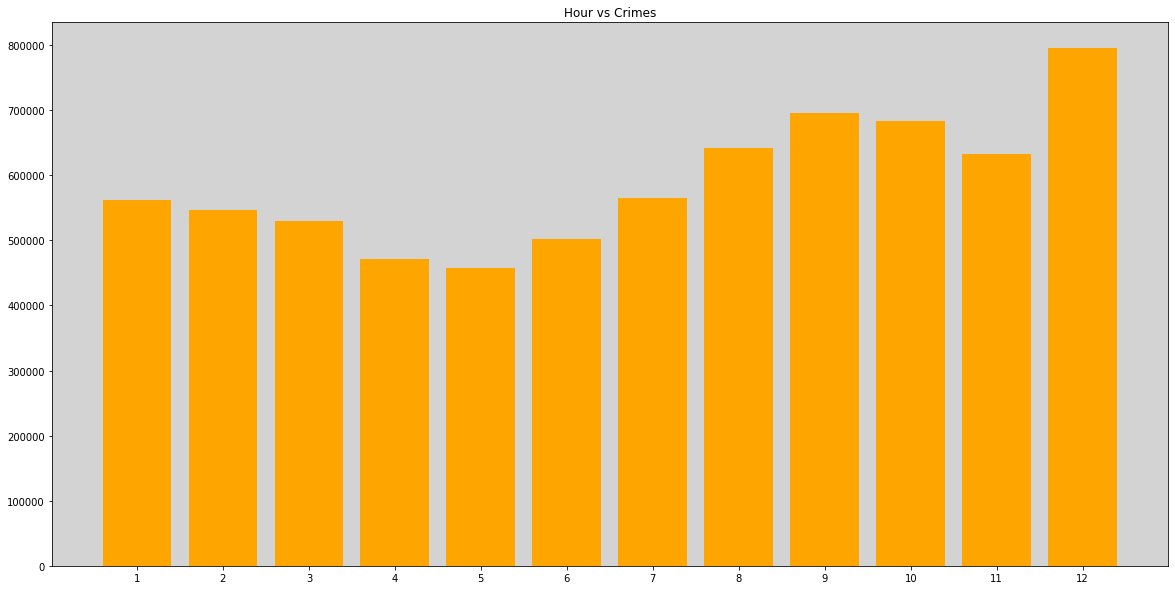

In [5]:
#Crime with time/date insights

months =after_dropped_data['Date'].dt.month #getting the months from the date
days=after_dropped_data['Date'].dt.day #getting the days from the date
hours=after_dropped_data['Date'].dt.hour #getting the hours from the date
after_dropped_data['Day']=days
after_dropped_data['Hour']=hours
after_dropped_data['Month']=months

#groups by month and counts the number
groupby_Month=after_dropped_data[['Month','Date']].groupby('Month').count().rename(columns={'Date': 'Crime Count'})
#groups by days of month and counts the number
groupby_Day=after_dropped_data[['Day','Date']].groupby('Day').count().rename(columns={'Date': 'Crime Count'})
#groups by Hour of the day and counts the number
groupby_Hour=after_dropped_data[['Hour','Date']].groupby('Hour').count().rename(columns={'Date': 'Crime Count'})



def plotTimes(x,y,tl,colr,plotType): #takes in dataframe and makes the plot
    fig, ax = plt.subplots(figsize=(20,10))  # Create a figure containing a single axes.
    if(plotType=='line'):
        ax.plot(x,y,color=colr,linewidth=2) #sets the color for the line and plots the data
    else:
        ax.bar(x,y,color=colr) #bar plot
    ax.set_facecolor('lightgray') #sets the background
    ax.set_title(tl) #sets the title
    if(x.dtype=='object'):
        ax.set_xticklabels(x,rotation=270)
    else:
        ax.set_xticks(x)
    plt.show()
    
print(groupby_Month.nlargest(10,'Crime Count')) # gets the top 10 months with highest crime
plotTimes(groupby_Month.index,groupby_Month['Crime Count'],'Month vs Crimes','lightskyblue','bar') #plotting the Month vs time
print(groupby_Day.nlargest(10,'Crime Count'))  # gets the top 10 days with highest crime
plotTimes(groupby_Day.index,groupby_Day['Crime Count'],'Day vs Crimes','green','bar')
print(groupby_Hour.nlargest(10,'Crime Count')) # gets the top 10 Hours with highest crime
plotTimes(groupby_Hour.index,groupby_Hour['Crime Count'],'Hour vs Crimes','orange','bar')

                            #following is used to plot using plotly library. it is the best.
# def plotTimes(x,y,colr,titl):
#     fig = go.Figure(data=go.Bar(x=x,y=y, marker_color=colr,text=y,textposition='auto'))
#     fig.update_layout(title_text=titl,plot_bgcolor='lightgray')
#     fig.show()

# plotTimes(groupby_Month.index,groupby_Month['Crime Count'],'lightskyblue','Months vs Crime')
# plotTimes(groupby_Day.index,groupby_Day['Date'],'green','Days vs Crime')
# plotTimes(groupby_Hour.index,groupby_Hour['Date'],'orange','Hours vs Crime')


## Some Insights about the time of day,day of month ,month of year vs Crimes in total  
1.Maximum crimes took place in the month of july with 655582 incidents, followed by August with 648995            incidents.  
2.Maximum crimes took place on 1st day of months with 279288 incidents, followed by 15th day of the              months with 240844 incidents.  
3.Maximum crimes took place during the the 12th hour with 795409 incidents,followed by 9th hour with 696188 incidents.   
        

    Year  Crime Count  Arrest  Percent of Arrest
4   2005       453722  140900          31.054258
3   2004       469392  144689          30.824769
5   2006       448131  135393          30.212817
6   2007       437035  131862          30.171954
2   2003       475954  141577          29.745942
0   2001       485764  141907          29.213157
1   2002       486762  141555          29.080947
13  2014       275452   79566          28.885613
8   2009       392744  110776          28.205651
12  2013       307231   86484          28.149503
             Year    Crime Count        Arrest  Percent of Arrest
count    20.00000      20.000000      20.00000          20.000000
mean   2010.50000  354189.050000   97203.80000          26.585949
std       5.91608  113301.631069   39667.43275           3.901221
min    2001.00000   37406.000000    8276.00000          19.554005
25%    2005.75000  269122.250000   66164.00000          24.843063
50%    2010.50000  361109.500000   98374.00000          27.752611

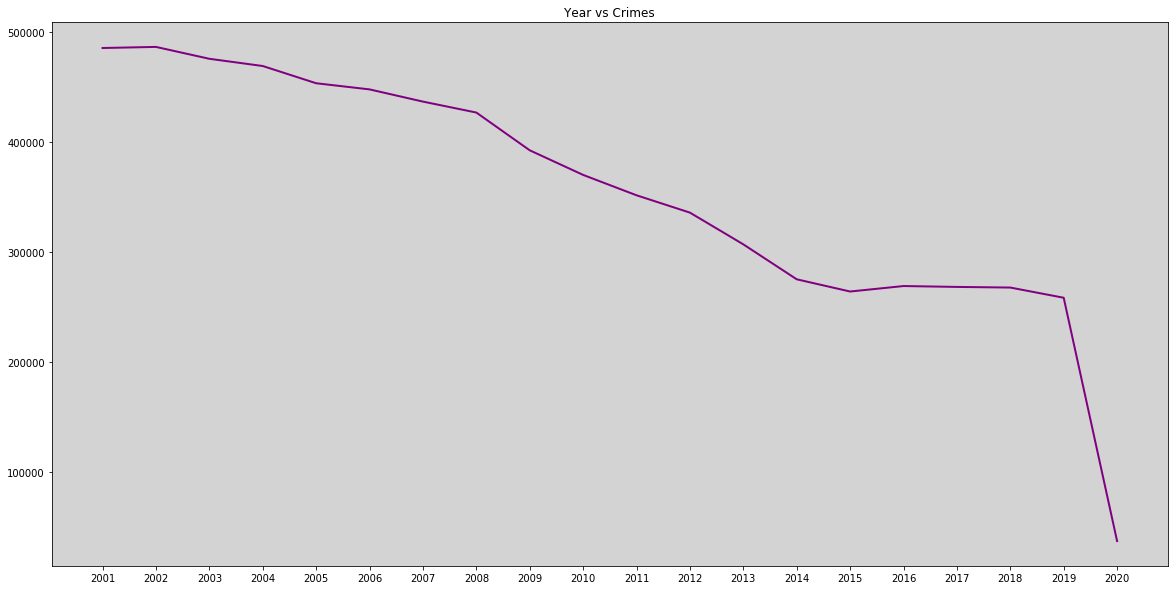

In [6]:
#insights and pattern crimes,number of arrestsand many other relations
#groupping by year and reseting the index
groupby_Year=after_dropped_data[['ID','Year']].groupby('Year').count().rename(columns={'ID': 'Crime Count'}).reset_index()

#grouping by year and arrest in order to get the percent of arrests made
groupby_Arrests_Year=after_dropped_data[['Arrest','Year','ID']].groupby(['Year','Arrest']).count().rename(columns={'ID': 'Crime Count'})
# reseting the index
groupby_Arrests_Year.reset_index(inplace=True)
#getting only the count of rows where Arrests where made
groupby_Arrests_Year.drop(groupby_Arrests_Year[groupby_Arrests_Year['Arrest']==False].index,inplace=True)
groupby_Arrests_Year.reset_index(inplace=True)

#merging the counted arrests into the year groupby frame
groupby_Year['Arrest']=groupby_Arrests_Year['Crime Count']

groupby_Year['Percent of Arrest']= (groupby_Year['Arrest']/groupby_Year['Crime Count'])*100
print(groupby_Year.nlargest(10,'Percent of Arrest'))
print(groupby_Year.describe())

#plotting the year and Crime Count
plotTimes(groupby_Year['Year'],groupby_Year['Crime Count'],'Year vs Crimes','purple','line')


## Insights for Crimes vs Year (from 2001-2019)
1. Looking at the Plot above it can be clearly seen that the Crimes have decreasing trend with increase in years.
2. From 2015 to 2019 theres is no significant decrease like it is from 2001 to 2014. it can also be seen there has been slight increase from 2015 to 2016 and then  decreasing trend from 2018 to 2019.
3. The maximum number of crimes where maximum in year 2001 and the least were in year 2019.

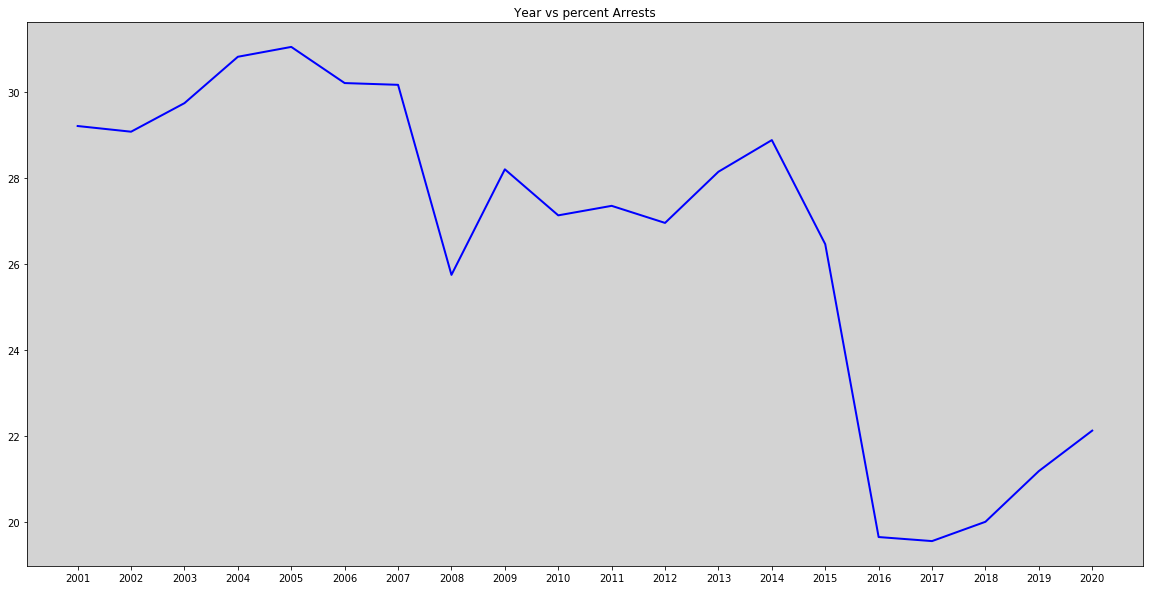

In [7]:
#plotting percent Arrests in a year
plotTimes(groupby_Year['Year'],groupby_Year['Percent of Arrest'],'Year vs percent Arrests','blue','line')

## Insights for Percent Arrest vs Year (from 2001-2020)
1. Looking at the plot it can be inferred that there is any kind of trend. There is a sudden drop in arrests in year 2007 and 2015.
2. Maximum arrest rate was in 2005 with 31.055% and lowest was in 2015 with 19.55%.

Primary Type    False
Arrested        False
Not Arrested    False
dtype: bool
         Primary Type  Arrested  Not Arrested  Arrest Percentage
9   DOMESTIC VIOLENCE         1           0.0         100.000000
26       PROSTITUTION     68894         267.0          99.613944
27   PUBLIC INDECENCY       176           1.0          99.435028
18          NARCOTICS    725587        4216.0          99.422310
10           GAMBLING     14467         104.0          99.286254
           Primary Type  Arrested  Not Arrested  Arrest Percentage
12    HUMAN TRAFFICKING         6          59.0           9.230769
17  MOTOR VEHICLE THEFT     29356      296561.0           9.007201
6       CRIMINAL DAMAGE     56597      748651.0           7.028518
20         NON-CRIMINAL        11         161.0           6.395349
3              BURGLARY     22983      377575.0           5.737746
            Arrested  Not Arrested  Arrest Percentage
count      35.000000  3.500000e+01          35.000000
mean    55545.028571  

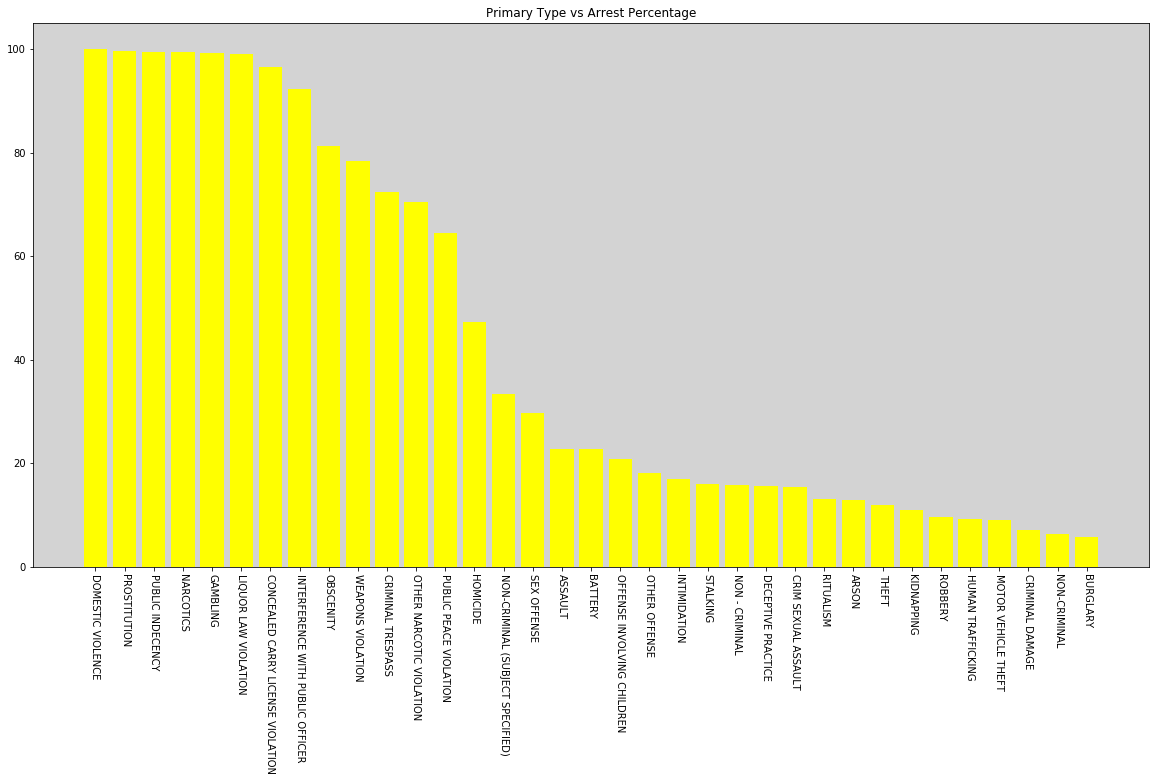

In [8]:
#using the after drop data to extract the number of the Arrests made per type of crime
Groupby_type=after_dropped_data[['Primary Type','Arrest','ID']].groupby(['Primary Type','Arrest']).count().reset_index()


#getting the Not Arrested value
Not_Arrested=Groupby_type.drop(Groupby_type[Groupby_type['Arrest']==True].index)
Not_Arrested=Not_Arrested.rename(columns={'ID':'Not Arrested'}).drop(columns=['Arrest'])


#getting the Arrested values
Arrested=Groupby_type.drop(Groupby_type[Groupby_type['Arrest']==False].index)
Arrested=Arrested.rename(columns={'ID':'Arrested'}).drop(columns=['Arrest'])

#merging the values of Arrested and Not Arrested based on Type of Crime
merged=pd.merge(Arrested,Not_Arrested,how='left', on='Primary Type')
#there is a hole in the data which is needed to be filled.
Groupby_type_Arrest=merged.fillna(0)

#checking if the dataframe has NaN or not
print(Groupby_type_Arrest.isna().any())

#Resulted DataFrame
Groupby_type_Arrest
#adding new column with percent arrests made per crime type
Groupby_type_Arrest['Arrest Percentage']=(Groupby_type_Arrest['Arrested']/(Groupby_type_Arrest['Arrested']+Groupby_type_Arrest['Not Arrested']))*100
Groupby_type_Arrest.sort_values('Arrest Percentage', ascending=False,inplace=True)
#Top
print(Groupby_type_Arrest.head())
print(Groupby_type_Arrest.tail())
print(Groupby_type_Arrest.drop(columns=['Primary Type']).describe())
plotTimes(Groupby_type_Arrest['Primary Type'],Groupby_type_Arrest['Arrest Percentage'],'Primary Type vs Arrest Percentage','Yellow','bar')

## Insights about types of Crime and their Arrest Rate
1. Plot shows Crimes like Domestic Violence, Prostitution,Public Indecency, Narcotics and Gambling having more than 99% percent of Arrest rate.  
2. Crimes Like Burglary,Criminal Damage,Robbery, Kidnapping,theft have Arrest rate less than 10%.
3. The Average arrest rate is 43.5 % with Std. Deviation  36.9%.

In [9]:
# getting insights about the Crime data with District locations.
groupby_districts=after_dropped_data[['ID','District']].groupby(['District']).count()
groupby_districts=groupby_districts.rename(columns={'ID':'CrimeCount'})

# Here I am getting the median coordinates of the Districts and storing them and 
#   adding the crime count
groupby_districts_locations=after_dropped_data[['Longitude','Latitude','District']].groupby(['District']).median()
groupby_districts_locations['CrimeCount']=groupby_districts['CrimeCount']
groupby_districts_locations.reset_index(inplace=True)
#printing the districts their
print(groupby_districts_locations)


#function which adds the marker on to the Map
def createCrimeMap(cmap,lat,long, values, districts):
    for i in range(len(lat)):  #iterating through the columns
        popup_text = """Crime Rate Index : {}<br>Crime Count : {}<br>District: {}<br>"""
        popup_text = popup_text.format(lat.index[i],values.iloc[i],districts.iloc[i])
        
        #if the crime count is less than 1000 then use regular marker else use circle marking which defines the intensity
        if(values.iloc[i]<1000):
            folium.Marker(location=[lat.iloc[i],long.iloc[i]],popup=popup_text,fill=True).add_to(cmap)
        else:
            folium.CircleMarker(location=[lat.iloc[i],long.iloc[i]],color='red',popup=popup_text,fill=True,radius=values.iloc[i]/20000 ).add_to(cmap)
    return cmap


#creating the map with folium
chicago_map = folium.Map(location=[41.864073,-87.706819],zoom_start=10,tiles="CartoDB positron")
chicago_map= createCrimeMap(chicago_map,groupby_districts_locations['Latitude'],groupby_districts_locations['Longitude'],groupby_districts_locations['CrimeCount'],groupby_districts_locations['District'])
chicago_map




   District  Longitude   Latitude  CrimeCount
0         1 -87.627701  41.878100      281924
1         2 -87.615969  41.809305      335014
2         3 -87.599466  41.770791      359173
3         4 -87.562060  41.740078      400709
4         5 -87.622516  41.688064      313850
5         6 -87.629382  41.748194      410326
6         7 -87.653941  41.775303      416212
7         8 -87.708497  41.779161      479488
8         9 -87.665206  41.811508      349815
9        10 -87.713642  41.853808      304691
10       11 -87.720554  41.880261      455308
11       12 -87.669745  41.882106      347405
12       14 -87.693301  41.914764      278195
13       15 -87.756949  41.884918      307565
14       16 -87.781268  41.964299      234103
15       17 -87.718241  41.959819      204590
16       18 -87.633787  41.900435      316093
17       19 -87.655984  41.946212      316098
18       20 -87.666539  41.977371      123328
19       21 -87.621915  41.837901           4
20       22 -87.655351  41.707027 

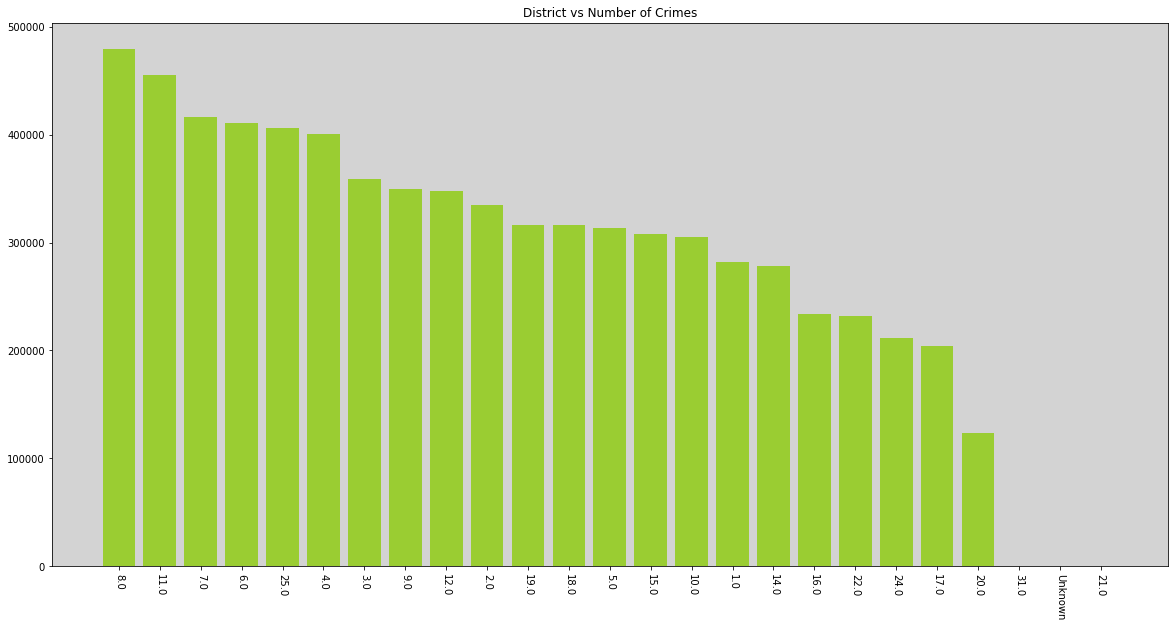

In [10]:
#plotting District vs Number of Crimes
groupby_districts_locations.sort_values(by='CrimeCount',ascending=False,inplace=True)
plotTimes(groupby_districts_locations['District'].apply(str),groupby_districts_locations['CrimeCount'],'District vs Number of Crimes','yellowgreen','bar')

## Insights about Police districts vs Crime rate over the years
1. From the plot it can noted that police district 8 has the maximum crime rate over the years with 479488, least has been in district 31 with 202 and district 21 with 4 cases from the given data.  
2. Districts with less than 1000 crimes might have been created recently as it is very unlikely to have that amount of crimes as compared to the other districts.  
3. There are 47 cases which are not in any district marked with unknown  

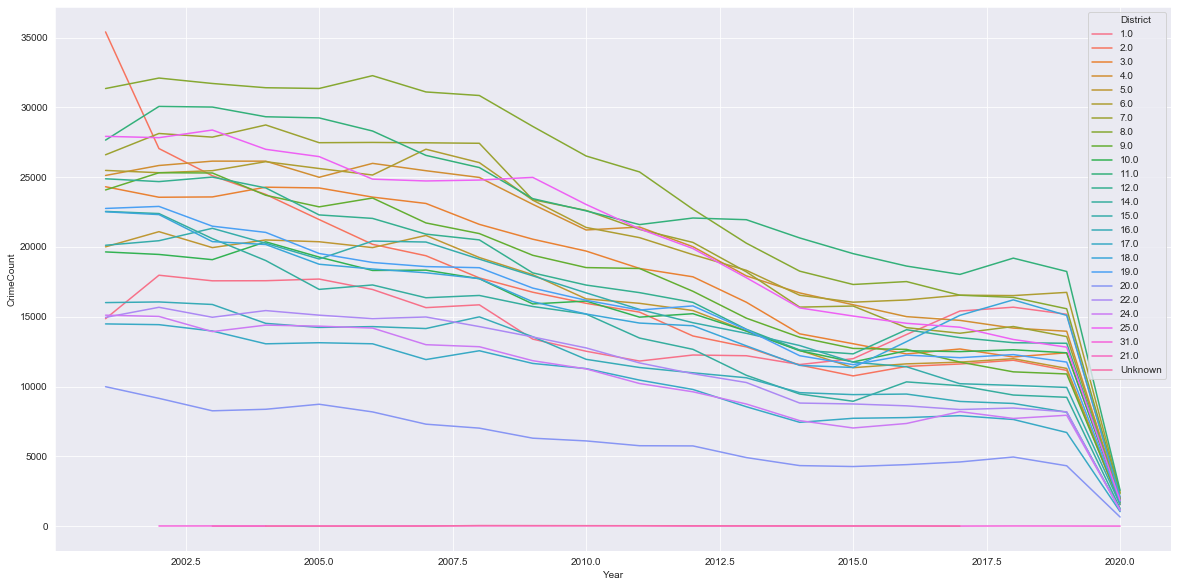

In [12]:
groupby_district_year= after_dropped_data[['District','ID','Year']].groupby(['Year','District']).count().rename(columns={'ID':'CrimeCount'})

groupby_district_year.reset_index(inplace=True)
#used plotly express to plot the graph might not print in pdf
fig = px.line(groupby_district_year, x="Year", y="CrimeCount", color="District",
              line_group="District", hover_name="District")
fig.show()

#used sns to plot the static plot
sns.set_style('darkgrid')
ax,figu=plt.subplots(figsize=(20,10))
sns.lineplot(data=groupby_district_year,x='Year',y='CrimeCount',hue='District')


## Insights for crime rate vs years for different police districts
1. Looking at the plot above there is a trend of decrease in crime rate as the year have increased for all the districts.  
2. District 2 had the highest crime rate in 2001 with 35,401, which decreased rapidly in 2002 to 27,045 and ended up with 11,154 in 2019.
3. District 8 started with 2nd highest crime rate in 2001 with 31,345 which stayed almost same with increase/decrease in magnitude of 1000 till 2006. District 8 had the highest crime rate from 2002 to 2012.


In [13]:
#Insights about total domestic cases and Arrests made
groupby_domestic=after_dropped_data[['Domestic','Arrest']][after_dropped_data['Domestic']==True].reset_index()
totalCount=after_dropped_data['ID'].count()
totalDomesticCount=groupby_domestic['Domestic'].count()
print("Total Crimes over the years from 2001 to 2020:         ",totalCount)
print("Total Domestic Cases over the years from 2001 to 2020: ",totalDomesticCount)
print("Domestic Percent of Total Cases:                       ",(totalDomesticCount/totalCount)*100)
groupby_domestic=groupby_domestic.drop(columns=['index'])
groupby_domestic_Arrests=groupby_domestic.groupby('Arrest').count()
ArrestMade=groupby_domestic_Arrests['Domestic'][True]
print("Percent of Arrest made in Domestic Cases:              ",(ArrestMade/totalDomesticCount)*100)

Total Crimes over the years from 2001 to 2020:          7083781
Total Domestic Cases over the years from 2001 to 2020:  940990
Domestic Percent of Total Cases:                        13.283725174451327
Percent of Arrest made in Domestic Cases:               19.6440982369632


## Insights about domestic crimes vs arrests made or not
1. There were total 940990 cases which were domestic out of 7083781 crimes in total, thats 13.28% of the total crimes.
2. Out of those 940990 domestic cases, in 184849 cases arrest were made, thats 19.64% of all domestic cases.

In [14]:
#Insights about domestic cases over the years with Arrests made
groupby_domestic_year=after_dropped_data[['Domestic','Arrest','Year']][after_dropped_data['Domestic']==True].reset_index()
groupby_domestic_year=groupby_domestic_year.drop(columns=['index'])
#getting the total numbers of Domestic crime per year
Total_Domestic_Year=groupby_domestic_year[['Domestic','Year']].groupby(['Year']).count().reset_index()

#getting the total Domestic crimes resulted in arrest per year
Total_Domestic_Year_Arrested=groupby_domestic_year[['Domestic','Arrest','Year']].groupby(['Year','Arrest']).count().reset_index()
Total_Domestic_Year_Arrested=Total_Domestic_Year_Arrested[Total_Domestic_Year_Arrested['Arrest']==True].drop(columns=['Arrest'])
Total_Domestic_Year_Arrested.reset_index(inplace=True)
Total_Domestic_Year_Arrested['Total Domestic Cases']=Total_Domestic_Year['Domestic']

#getting the percent arrests made per year
Total_Domestic_Year_Arrested['Percent Arrested']=(Total_Domestic_Year_Arrested['Domestic']/Total_Domestic_Year_Arrested['Total Domestic Cases'])*100
Total_Domestic_Year_Arrested=Total_Domestic_Year_Arrested.drop(columns=['index']).rename(columns={'Domestic':'Domestic Arrested'})
Total_Domestic_Year_Arrested.sort_values('Percent Arrested',ascending=False,inplace=True)

#final frame with details
print(Total_Domestic_Year_Arrested.describe())
Total_Domestic_Year_Arrested

             Year  Domestic Arrested  Total Domestic Cases  Percent Arrested
count    20.00000           20.00000             20.000000         20.000000
mean   2010.50000         9242.45000          47049.500000         19.488761
std       5.91608         2447.88494          11147.707291          1.581424
min    2001.00000         1089.00000           6268.000000         17.346631
25%    2005.75000         8389.00000          43086.250000         18.088245
50%    2010.50000         9476.50000          50004.500000         19.745218
75%    2015.25000        10820.50000          52147.750000         20.737114
max    2020.00000        12569.00000          61194.000000         21.853324


,Year,Domestic Arrested,Total Domestic Cases,Percent Arrested
13,2014,8853,40511,21.853324
6,2007,10954,50961,21.494869
2,2003,11486,53834,21.335959
3,2004,11498,54481,21.104605
5,2006,10776,51326,20.995207
14,2015,8640,41838,20.651083
1,2002,12569,61194,20.539595
4,2005,10419,50736,20.535714
8,2009,10690,53008,20.166767
12,2013,8940,44944,19.891420


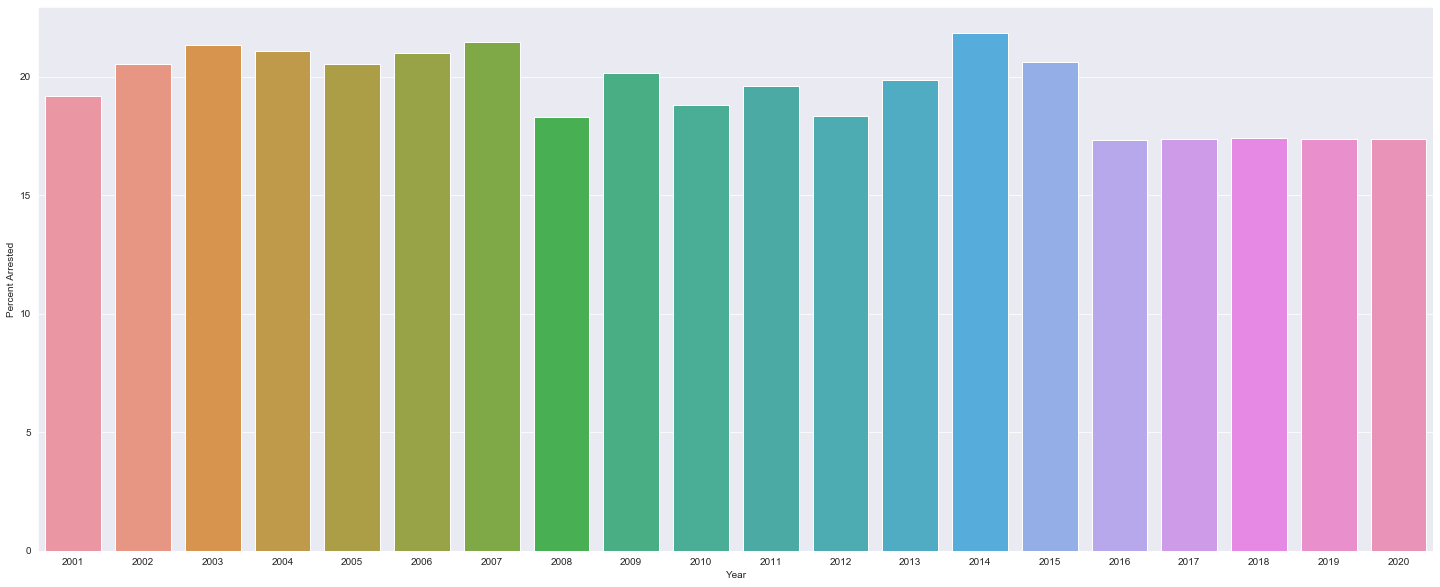

In [15]:
ax,fig=plt.subplots(figsize=(25,10))
sns.barplot(x=Total_Domestic_Year_Arrested['Year'],y=Total_Domestic_Year_Arrested['Percent Arrested'])

## Insights about the Arrests made in cases of Domestic crimes per year.
1. There is no significant change in the arrests made for domestic crimes over the years with Std. Dev. being 1.58%.  
2. Maximum arrests were made in year 2014 with 21.49% arrest rate. Minimum arrests were made in year 2016 with 17.34%.  

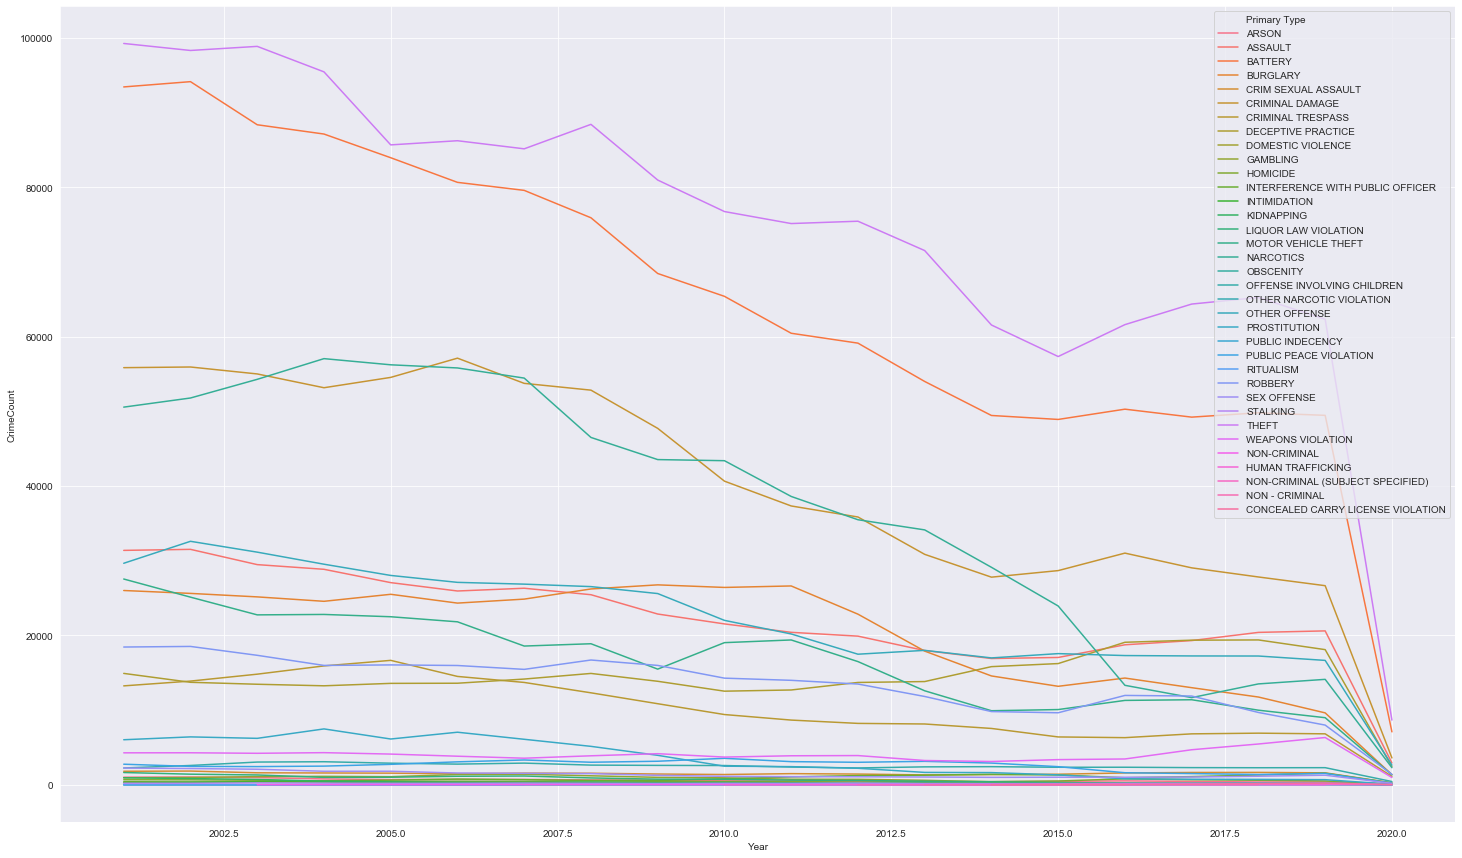

In [85]:
groupby_crimes_year=after_dropped_data[['ID','Year','Primary Type']].groupby(['Year','Primary Type']).count().reset_index().rename(columns={'ID':'CrimeCount'})


fig = px.line(groupby_crimes_year, x="Year", y="CrimeCount", color="Primary Type",
              line_group="Primary Type", hover_name="Primary Type",width=1000, height=800)
fig.show()

ax,fig=plt.subplots(figsize=(25,15))
sns.lineplot(data=groupby_crimes_year,x='Year',y='CrimeCount',hue='Primary Type')

## Insights about the Types of Crimes over the Year form 2001 to 2020.
1. Theft have been the largest crimes over the years from 2001-2020.  
2. Battery crimes have been the 2nd largest crime from 2001-2020. But it has  a decreasing trend as the years have increase.  
3. Over the years battery and theft have  been dominating the other crimes.
4. Narcotics Crime which were 57,000 in 2004 saw an significant decrease over the years and was 14,113 in 2019. 

In [164]:
# getting insights about type of crimes and the districts.
#grouping by district and then crime type
groupby_district_crimetype=after_dropped_data[['ID','Primary Type','District']].groupby(['District','Primary Type']).count().reset_index()
groupby_district_crimetype=groupby_district_crimetype.rename(columns={'ID':'CrimeCount'})
# print(groupby_district_crimetype)
# using plotly to plot. it is the easiest and interactive.
fig = px.bar(groupby_district_crimetype, x="District", y="CrimeCount", color="Primary Type",hover_name="Primary Type")
fig.show()


## Insights about Police Districts and Crime Types.
1. District 18 has maximum theft crimes than any other district.
2. District 11 has the maximum Narcotics crimes than any other district.
3. District 7 has the maximum Battery crimes than any other district.
4. Districct 8 has maximum of crimes  with thefts being 94,357 and battery with 79,697 constituting the most of the crimes in that district.